In [1]:
import pandas as pd
import warnings
import matplotlib
import statsmodels.api as sm
import itertools 
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib

In [2]:
sales1= pd.read_csv("DATA.csv")

##### sales1

In [3]:
sales1.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [4]:
sales1['Order Date']=pd.to_datetime(sales1['Order Date'],infer_datetime_format=True)
indexsales1=sales1.set_index(['Order Date'])
indexsales1.head(5)

,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
2017-08-11,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2017-08-11,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2017-12-06,3,CA-2017-138688,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
2016-11-10,4,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
2016-11-10,5,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
cols=['Row ID' ,'Order ID',  'Ship Date', 'Ship Mode','Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State','Postal Code', 'Region', 'Product ID', 'Product Name']
indexsales1.drop(cols,axis=1,inplace=True)

In [6]:
indexsales1

,Category,Sub-Category,Sales
Order Date,,,
2017-08-11,Furniture,Bookcases,261.9600
2017-08-11,Furniture,Chairs,731.9400
2017-12-06,Office Supplies,Labels,14.6200
2016-11-10,Furniture,Tables,957.5775
2016-11-10,Office Supplies,Storage,22.3680
...,...,...,...
2017-05-21,Office Supplies,Binders,3.7980
2016-12-01,Office Supplies,Art,10.3680
2016-12-01,Technology,Phones,235.1880


In [7]:
indexsales1['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [8]:
indexsales1.isnull().sum()

Category        0
Sub-Category    0
Sales           0
dtype: int64

In [9]:
furniture=indexsales1.loc[indexsales1['Category']=='Furniture']
furniture=furniture.sort_values('Order Date')
furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture=furniture.set_index('Order Date')
furniture.index
furniture



,Sales
Order Date,
2015-01-03,1893.9950
2015-01-06,2024.0600
2015-01-08,44.1280
2015-01-11,31.6800
2015-01-12,4513.6060
...,...
2018-12-24,1393.4940
2018-12-25,832.4540
2018-12-28,551.2568


In [10]:
y_furniture=furniture['Sales'].resample('MS').mean()
furniture=pd.DataFrame({'Order Date':y_furniture.index,'Sales':y_furniture.values})
furniture



,Order Date,Sales
0,2015-01-01,924.024462
1,2015-02-01,248.475714
2,2015-03-01,778.884778
3,2015-04-01,525.167692
4,2015-05-01,390.457467
5,2015-06-01,611.823918
6,2015-07-01,601.328500
7,2015-08-01,762.809906
8,2015-09-01,844.152147
9,2015-10-01,818.771824


In [11]:
furniture=furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture=furniture.set_index('Order Date')
furniture

,Sales
Order Date,
2015-01-01,924.024462
2015-02-01,248.475714
2015-03-01,778.884778
2015-04-01,525.167692
2015-05-01,390.457467
2015-06-01,611.823918
2015-07-01,601.328500
2015-08-01,762.809906
2015-09-01,844.152147


<AxesSubplot:xlabel='Order Date'>

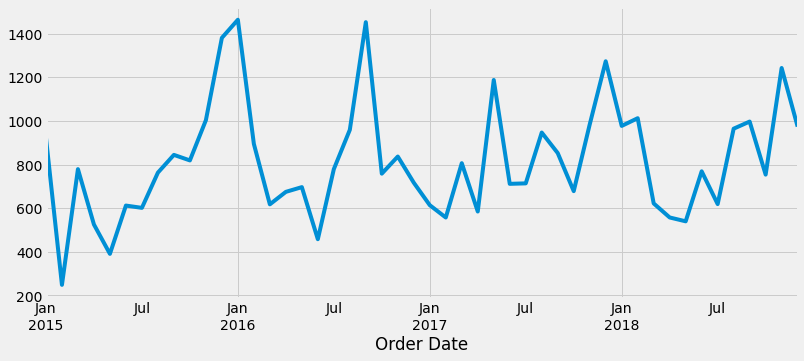

In [12]:
furniture['Sales'].plot(figsize=(12,5))

In [13]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(furniture['Sales'])

1. ADF :  -4.05396376115166
2. P-Value :  0.0011528619101255277
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression: 37
5. Critical Values :
	 1% :  -3.6209175221605827
	 5% :  -2.9435394610388332
	 10% :  -2.6104002410518627


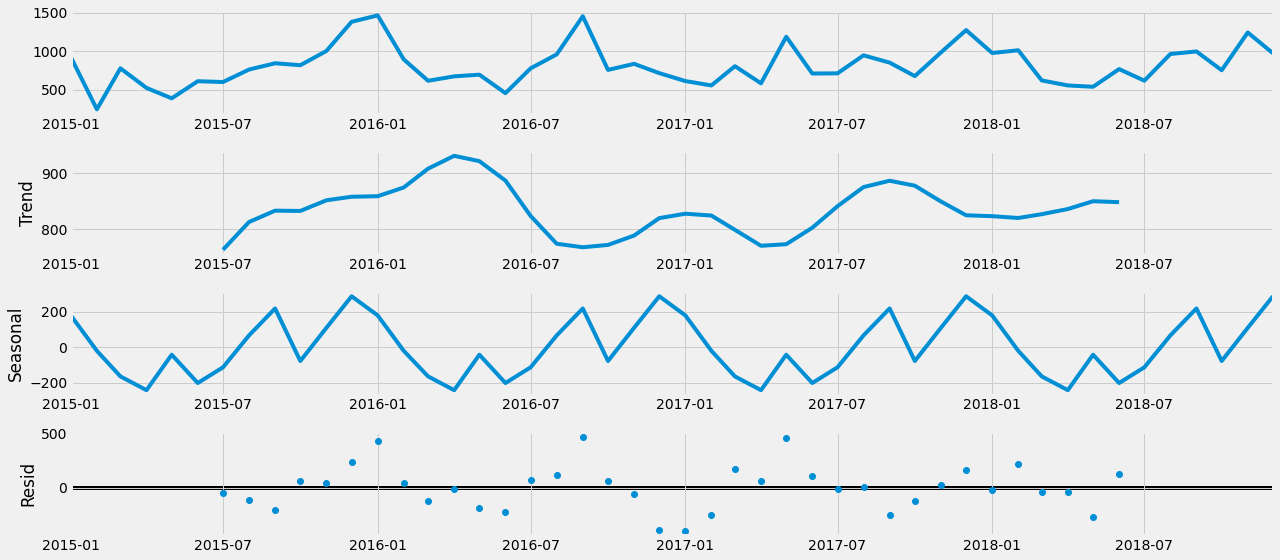

In [14]:
from pylab import rcParams 
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(furniture,model='additive')
fig=decomposition.plot()
plt.show()

In [15]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinatios for Seasonal ARIMA...')
print('SARIMAX:{}X{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{}X{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{}X{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{}X{}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinatios for Seasonal ARIMA...
SARIMAX:(0, 0, 1)X(0, 0, 1, 12)
SARIMAX:(0, 0, 1)X(0, 1, 0, 12)
SARIMAX:(0, 1, 0)X(0, 1, 1, 12)
SARIMAX:(0, 1, 0)X(1, 0, 0, 12)


In [16]:
for param in pdq :
    for param_seasonal in seasonal_pdq:
        try:
            mod =sm.tsa.statespace.SARIMAX(furniture['Sales'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}X{}12-AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue
    

ARIMA(0, 0, 0)X(0, 0, 0, 12)12-AIC:769.9073451818964
ARIMA(0, 0, 0)X(0, 0, 1, 12)12-AIC:1644.573700158587
ARIMA(0, 0, 0)X(0, 1, 0, 12)12-AIC:512.0648979435964
ARIMA(0, 0, 0)X(0, 1, 1, 12)12-AIC:315.9084396682756
ARIMA(0, 0, 0)X(1, 0, 0, 12)12-AIC:529.1321541418888
ARIMA(0, 0, 0)X(1, 0, 1, 12)12-AIC:1457.4904244340848
ARIMA(0, 0, 0)X(1, 1, 0, 12)12-AIC:334.0886901361257
ARIMA(0, 0, 0)X(1, 1, 1, 12)12-AIC:317.89014232458766
ARIMA(0, 0, 1)X(0, 0, 0, 12)12-AIC:717.1093133963244
ARIMA(0, 0, 1)X(0, 0, 1, 12)12-AIC:2731.796216672444
ARIMA(0, 0, 1)X(0, 1, 0, 12)12-AIC:494.42560067001517
ARIMA(0, 0, 1)X(0, 1, 1, 12)12-AIC:302.2840561799651
ARIMA(0, 0, 1)X(1, 0, 0, 12)12-AIC:526.425292427843
ARIMA(0, 0, 1)X(1, 0, 1, 12)12-AIC:2702.6480863991596
ARIMA(0, 0, 1)X(1, 1, 0, 12)12-AIC:336.0827327700041
ARIMA(0, 0, 1)X(1, 1, 1, 12)12-AIC:304.26633241584966
ARIMA(0, 1, 0)X(0, 0, 0, 12)12-AIC:652.9864396192831
ARIMA(0, 1, 0)X(0, 0, 1, 12)12-AIC:1414.6899429821026
ARIMA(0, 1, 0)X(0, 1, 0, 12)12-AIC:507.61

In [17]:
train=furniture.iloc[:-20]
test=furniture.iloc[-20:]
print(train.shape,test.shape)

(28, 1) (20, 1)


In [18]:
test=test.groupby('Order Date')['Sales'].sum().reset_index()
test=test.set_index('Order Date')
test

,Sales
Order Date,
2017-05-01,1187.366147
2017-06-01,711.414500
2017-07-01,713.570353
2017-08-01,946.465800
2017-09-01,852.411695
2017-10-01,677.889150
2017-11-01,983.663476
2017-12-01,1273.200938
2018-01-01,976.935250


In [19]:
mod =sm.tsa.statespace.SARIMAX(train['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False)
results=mod.fit()


In [20]:
start=len(train)
end=len(train)+len(test)-1
pred=results.predict(start=start,end=end,typ='levels')
pred.index=furniture.index[start:end+1]
print(pred)

Order Date
2017-05-01     499.219116
2017-06-01     603.467257
2017-07-01     678.271205
2017-08-01     842.477784
2017-09-01    1021.785774
2017-10-01     835.509425
2017-11-01     982.870691
2017-12-01    1219.476501
2018-01-01    1297.864554
2018-02-01     674.969545
2018-03-01     720.736604
2018-04-01     655.442872
2018-05-01     614.386422
2018-06-01     562.218503
2018-07-01     747.425876
2018-08-01     918.524465
2018-09-01    1239.365817
2018-10-01     823.931764
2018-11-01     940.186735
2018-12-01    1015.941464
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Order Date'>

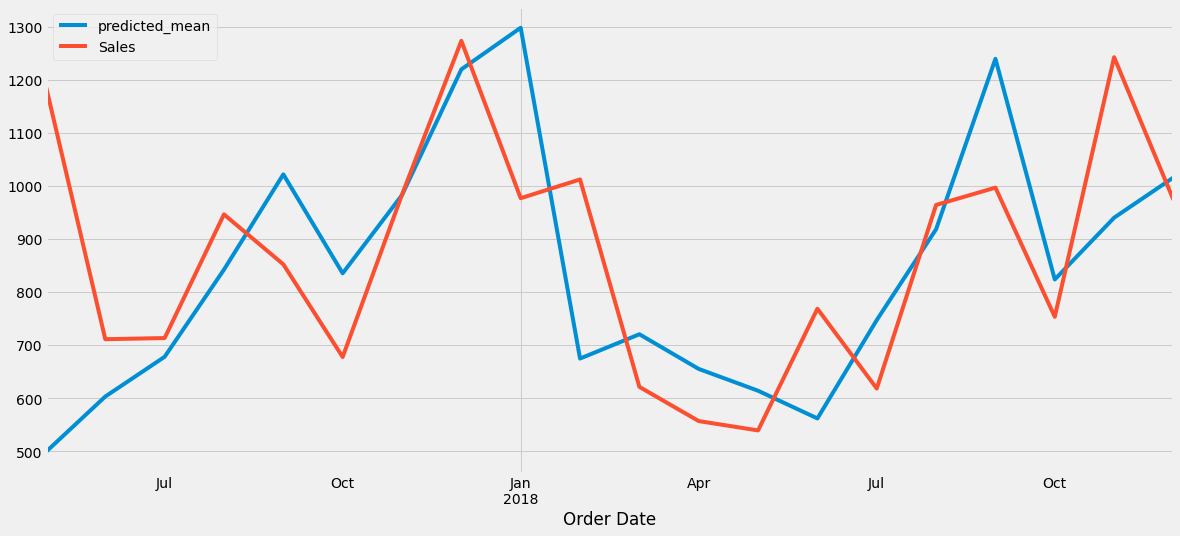

In [21]:
pred.plot(legend=True)
test['Sales'].plot(legend=True)

In [22]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,test)

50685.799116063674

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

225.13506860563433


In [24]:
mod =sm.tsa.statespace.SARIMAX(furniture['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False)
results2=mod.fit()

In [25]:
furniture.tail()

,Sales
Order Date,
2018-08-01,964.181818
2018-09-01,996.806227
2018-10-01,753.598800
2018-11-01,1242.404375
2018-12-01,973.765627


In [26]:
furniture.shape

(48, 1)

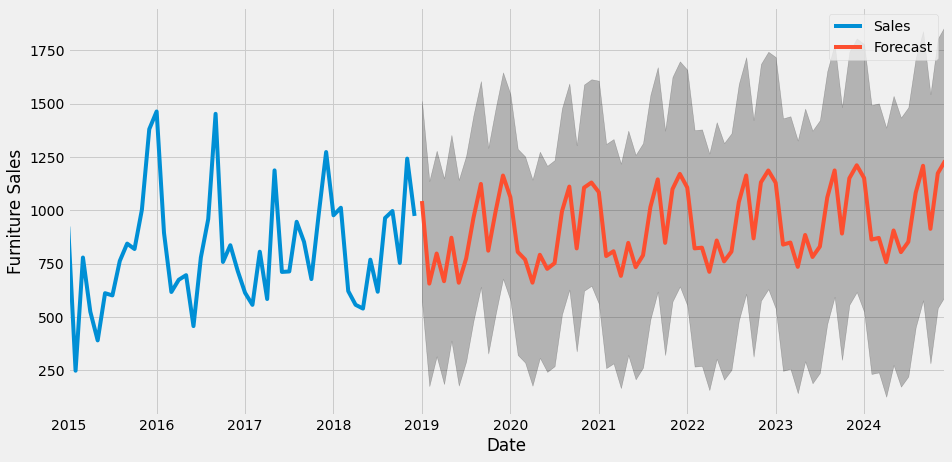

In [27]:
pred1=results2.get_forecast(steps=72)
predc=pred1.conf_int()
ax=furniture.plot(label='observed',figsize=(14,7))
pred1.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(predc.index,predc.iloc[:,0],predc.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [28]:
technology =indexsales1.loc[indexsales1['Category']=='Technology']
technology=technology.sort_values('Order Date')
technology=technology.groupby('Order Date')['Sales'].sum().reset_index()
technology=technology.set_index('Order Date')
technology

,Sales
Order Date,
2015-01-02,468.900
2015-01-03,5.940
2015-01-06,881.930
2015-01-07,575.920
2015-01-09,357.000
...,...
2018-12-25,401.208
2018-12-27,164.388
2018-12-28,14.850


In [29]:
y_technology=technology['Sales'].resample('MS').mean()
technology=pd.DataFrame({'Order Date':y_technology.index,'Sales':y_technology.values})
technology

,Order Date,Sales
0,2015-01-01,700.040000
1,2015-02-01,503.799000
2,2015-03-01,2183.300800
3,2015-04-01,942.553000
4,2015-05-01,399.747368
5,2015-06-01,546.378600
6,2015-07-01,600.016167
7,2015-08-01,1291.196308
8,2015-09-01,1424.456235
9,2015-10-01,855.612400


In [30]:
technology=technology.groupby('Order Date')['Sales'].sum().reset_index()
technology=technology.set_index('Order Date')
technology

,Sales
Order Date,
2015-01-01,700.040000
2015-02-01,503.799000
2015-03-01,2183.300800
2015-04-01,942.553000
2015-05-01,399.747368
2015-06-01,546.378600
2015-07-01,600.016167
2015-08-01,1291.196308
2015-09-01,1424.456235


<AxesSubplot:xlabel='Order Date'>

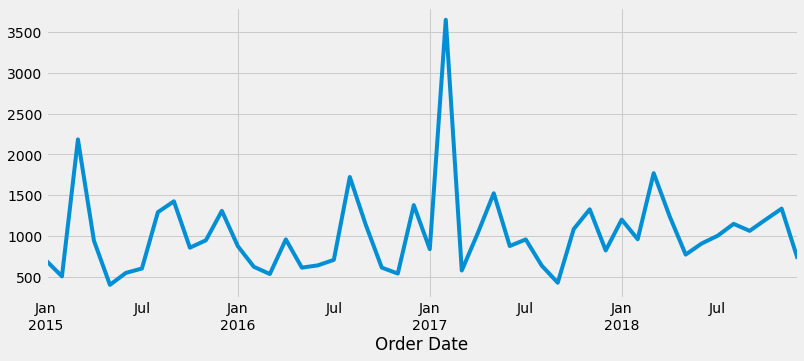

In [31]:
technology['Sales'].plot(figsize=(12,5))

In [32]:
ad_test(technology['Sales'])

1. ADF :  -7.368123278099122
2. P-Value :  9.12166320862809e-11
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 47
5. Critical Values :
	 1% :  -3.5778480370438146
	 5% :  -2.925338105429433
	 10% :  -2.6007735310095064


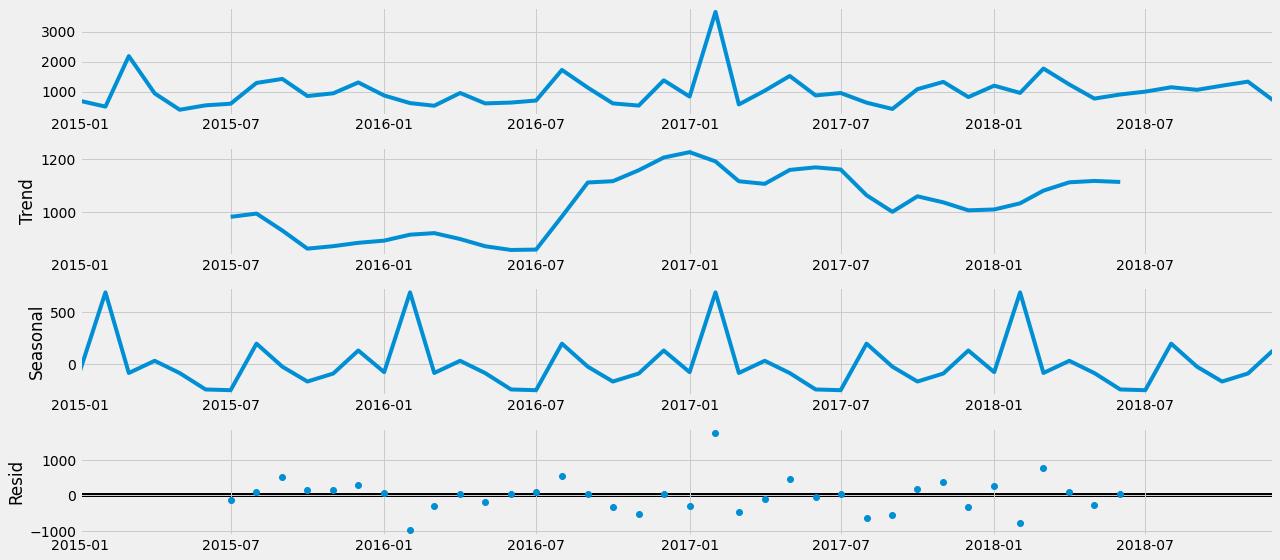

In [33]:
from pylab import rcParams 
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(technology,model='additive')
fig=decomposition.plot()
plt.show()

In [34]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinatios for Seasonal ARIMA...')
print('SARIMAX:{}X{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{}X{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{}X{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{}X{}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinatios for Seasonal ARIMA...
SARIMAX:(0, 0, 1)X(0, 0, 1, 12)
SARIMAX:(0, 0, 1)X(0, 1, 0, 12)
SARIMAX:(0, 1, 0)X(0, 1, 1, 12)
SARIMAX:(0, 1, 0)X(1, 0, 0, 12)


In [35]:
for param in pdq :
    for param_seasonal in seasonal_pdq:
        try:
            mod =sm.tsa.statespace.SARIMAX(technology['Sales'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}X{}12-AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)X(0, 0, 0, 12)12-AIC:798.8271282919636
ARIMA(0, 0, 0)X(0, 0, 1, 12)12-AIC:1403.7768462033666
ARIMA(0, 0, 0)X(0, 1, 0, 12)12-AIC:574.9880253518048
ARIMA(0, 0, 0)X(0, 1, 1, 12)12-AIC:376.8263115874772
ARIMA(0, 0, 0)X(1, 0, 0, 12)12-AIC:587.6711884879505
ARIMA(0, 0, 0)X(1, 0, 1, 12)12-AIC:1383.406782213698
ARIMA(0, 0, 0)X(1, 1, 0, 12)12-AIC:395.5513150032792
ARIMA(0, 0, 0)X(1, 1, 1, 12)12-AIC:378.80415945955906
ARIMA(0, 0, 1)X(0, 0, 0, 12)12-AIC:764.9405584642694
ARIMA(0, 0, 1)X(0, 0, 1, 12)12-AIC:2728.345473905928
ARIMA(0, 0, 1)X(0, 1, 0, 12)12-AIC:560.9266923205743
ARIMA(0, 0, 1)X(0, 1, 1, 12)12-AIC:341.51279333474145
ARIMA(0, 0, 1)X(1, 0, 0, 12)12-AIC:589.6283035638478
ARIMA(0, 0, 1)X(1, 0, 1, 12)12-AIC:2561.6339691572985
ARIMA(0, 0, 1)X(1, 1, 0, 12)12-AIC:396.54426243888946
ARIMA(0, 0, 1)X(1, 1, 1, 12)12-AIC:342.5000618095508
ARIMA(0, 1, 0)X(0, 0, 0, 12)12-AIC:748.1412946320693
ARIMA(0, 1, 0)X(0, 0, 1, 12)12-AIC:1127.619732160309
ARIMA(0, 1, 0)X(0, 1, 0, 12)12-AIC:587.46

In [36]:
train=technology.iloc[:-20]
test=technology.iloc[-20:]
print(train.shape,test.shape)

(28, 1) (20, 1)


In [37]:
test=test.groupby('Order Date')['Sales'].sum().reset_index()
test=test.set_index('Order Date')
test

,Sales
Order Date,
2017-05-01,1522.818471
2017-06-01,876.069316
2017-07-01,956.665167
2017-08-01,635.795500
2017-09-01,426.016100
2017-10-01,1083.918294
2017-11-01,1326.039478
2017-12-01,821.522053
2018-01-01,1200.383632


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0506      1.435     -0.035      0.972      -2.863       2.762
ma.L1         -1.0000   1.69e+04  -5.93e-05      1.000   -3.31e+04    3.31e+04
ar.S.L12       0.5154      9.279      0.056      0.956     -17.670      18.701
ma.S.L12      -1.0002   1.69e+04  -5.93e-05      1.000    -3.3e+04     3.3e+04
sigma2      6.491e+05      0.004   1.81e+08      0.000    6.49e+05    6.49e+05


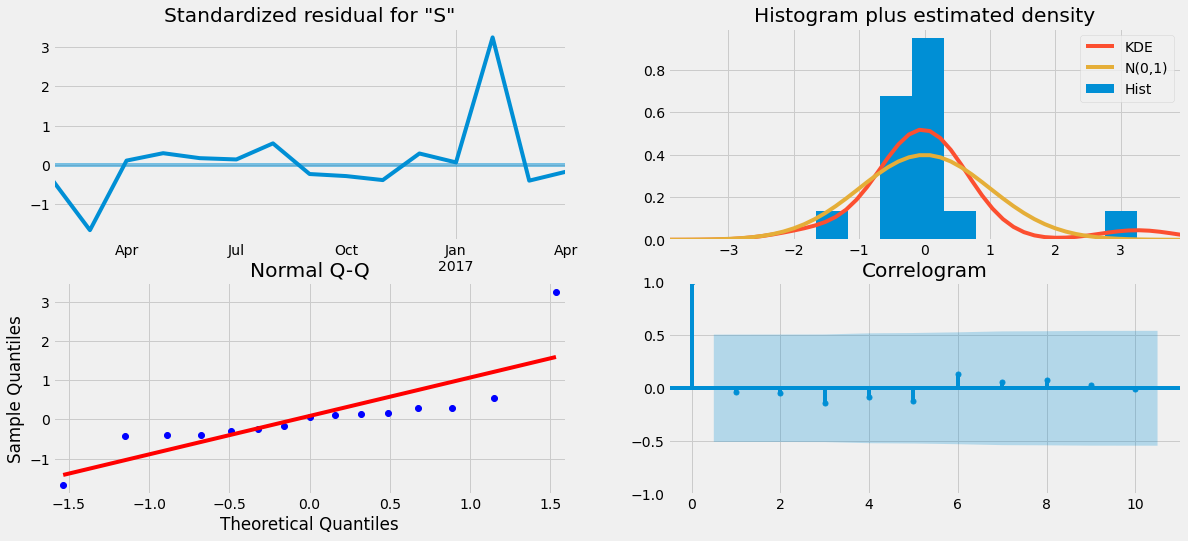

In [38]:
mod =sm.tsa.statespace.SARIMAX(train['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False)
results=mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics()
plt.show()

In [39]:
start=len(train)
end=len(train)+len(test)-1
pred=results.predict(start=start,end=end,typ='levels')
pred.index=technology.index[start:end+1]
print(pred)

Order Date
2017-05-01     809.446948
2017-06-01     835.328558
2017-07-01     915.170368
2017-08-01    1769.123129
2017-09-01    1367.795752
2017-10-01     898.853459
2017-11-01     844.258825
2017-12-01    1470.652710
2018-01-01    1078.601148
2018-02-01    2989.328835
2018-03-01    1059.777487
2018-04-01    1253.754107
2018-05-01     984.981530
2018-06-01    1015.238285
2018-07-01    1101.133441
2018-08-01    1871.342945
2018-09-01    1566.578281
2018-10-01    1125.492584
2018-11-01    1080.417766
2018-12-01    1596.820723
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Order Date'>

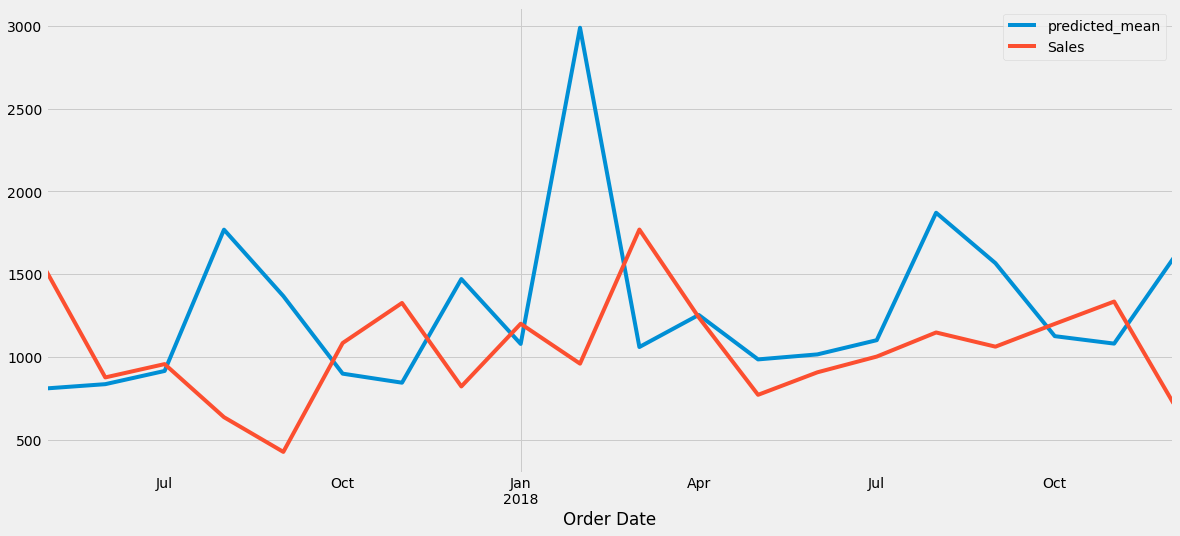

In [40]:
pred.plot(legend=True)
test['Sales'].plot(legend=True)

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,test)

484835.16708224016

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

696.3010606643079


In [43]:
mod =sm.tsa.statespace.SARIMAX(technology['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False)
results2=mod.fit()

In [44]:
technology.tail()

,Sales
Order Date,
2018-08-01,1147.733500
2018-09-01,1061.983500
2018-10-01,1199.745667
2018-11-01,1334.547208
2018-12-01,719.515684


In [45]:
technology.shape

(48, 1)

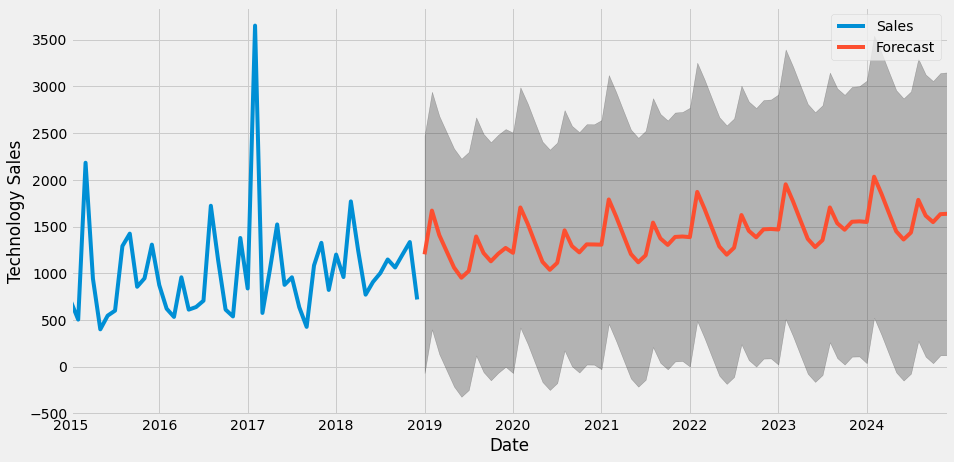

In [46]:
pred1=results2.get_forecast(steps=72)
predc=pred1.conf_int()
ax=technology.plot(label='observed',figsize=(14,7))
pred1.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(predc.index,predc.iloc[:,0],predc.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Technology Sales')
plt.legend()
plt.show()

In [47]:
office_supplies =indexsales1.loc[indexsales1['Category']=='Office Supplies']
office_supplies=office_supplies.sort_values('Order Date')
office_supplies=office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies=office_supplies.set_index('Order Date')
office_supplies

,Sales
Order Date,
2015-01-03,303.216
2015-01-04,119.888
2015-01-06,2282.530
2015-01-07,25.104
2015-01-08,184.200
...,...
2018-12-26,814.594
2018-12-27,13.248
2018-12-28,1091.244


In [48]:
y_office_supplies=office_supplies['Sales'].resample('MS').mean()
office_supplies=pd.DataFrame({'Order Date':y_office_supplies.index,'Sales':y_office_supplies.values})
office_supplies

,Order Date,Sales
0,2015-01-01,442.918737
1,2015-02-01,218.343909
2,2015-03-01,302.427250
3,2015-04-01,352.387750
4,2015-05-01,698.627304
5,2015-06-01,504.030905
6,2015-07-01,725.808818
7,2015-08-01,439.934474
8,2015-09-01,988.528962
9,2015-10-01,339.506087


In [49]:
office_supplies=office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies=office_supplies.set_index('Order Date')
office_supplies

,Sales
Order Date,
2015-01-01,442.918737
2015-02-01,218.343909
2015-03-01,302.427250
2015-04-01,352.387750
2015-05-01,698.627304
2015-06-01,504.030905
2015-07-01,725.808818
2015-08-01,439.934474
2015-09-01,988.528962


<AxesSubplot:xlabel='Order Date'>

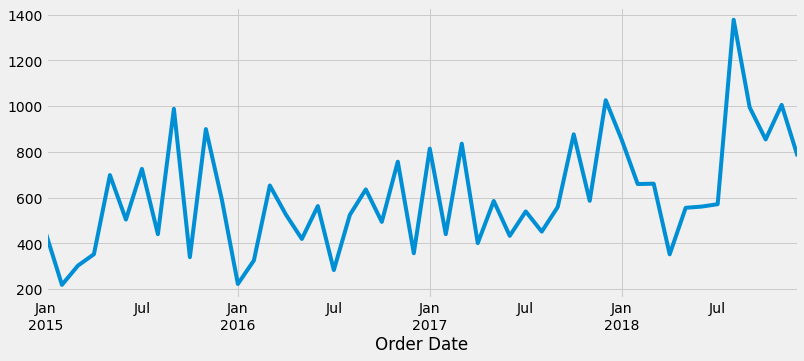

In [50]:
office_supplies['Sales'].plot(figsize=(12,5))

In [51]:
ad_test(office_supplies['Sales'])

1. ADF :  -2.8519517678982327
2. P-Value :  0.05122744844475518
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression: 46
5. Critical Values :
	 1% :  -3.5812576580093696
	 5% :  -2.9267849124681518
	 10% :  -2.6015409829867675


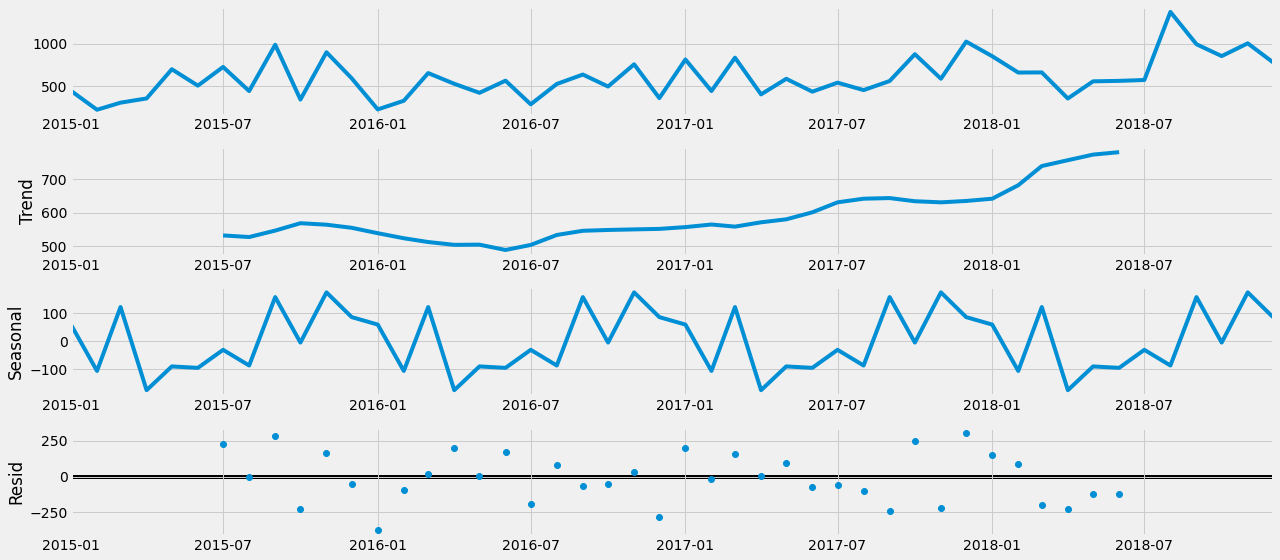

In [52]:
from pylab import rcParams 
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(office_supplies,model='additive')
fig=decomposition.plot()
plt.show()

In [53]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinatios for Seasonal ARIMA...')
print('SARIMAX:{}X{}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX:{}X{}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX:{}X{}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX:{}X{}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinatios for Seasonal ARIMA...
SARIMAX:(0, 0, 1)X(0, 0, 1, 12)
SARIMAX:(0, 0, 1)X(0, 1, 0, 12)
SARIMAX:(0, 1, 0)X(0, 1, 1, 12)
SARIMAX:(0, 1, 0)X(1, 0, 0, 12)


In [54]:
for param in pdq :
    for param_seasonal in seasonal_pdq:
        try:
            mod =sm.tsa.statespace.SARIMAX(office_supplies['Sales'],order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}X{}12-AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)X(0, 0, 0, 12)12-AIC:744.9374231679759
ARIMA(0, 0, 0)X(0, 0, 1, 12)12-AIC:1410.191468821238
ARIMA(0, 0, 0)X(0, 1, 0, 12)12-AIC:501.3497718660246
ARIMA(0, 0, 0)X(0, 1, 1, 12)12-AIC:331.21109493161623
ARIMA(0, 0, 0)X(1, 0, 0, 12)12-AIC:517.094204505464
ARIMA(0, 0, 0)X(1, 0, 1, 12)12-AIC:1282.2632178880237
ARIMA(0, 0, 0)X(1, 1, 0, 12)12-AIC:347.739509498382
ARIMA(0, 0, 0)X(1, 1, 1, 12)12-AIC:332.25115623004723
ARIMA(0, 0, 1)X(0, 0, 0, 12)12-AIC:705.3863369545277
ARIMA(0, 0, 1)X(0, 0, 1, 12)12-AIC:2790.752598672211
ARIMA(0, 0, 1)X(0, 1, 0, 12)12-AIC:489.89647172929494
ARIMA(0, 0, 1)X(0, 1, 1, 12)12-AIC:319.208605132564
ARIMA(0, 0, 1)X(1, 0, 0, 12)12-AIC:518.865053133424
ARIMA(0, 0, 1)X(1, 0, 1, 12)12-AIC:2601.8946262505874
ARIMA(0, 0, 1)X(1, 1, 0, 12)12-AIC:348.9629654896913
ARIMA(0, 0, 1)X(1, 1, 1, 12)12-AIC:320.29190309242784
ARIMA(0, 1, 0)X(0, 0, 0, 12)12-AIC:659.99279584349
ARIMA(0, 1, 0)X(0, 0, 1, 12)12-AIC:1661.4983629877324
ARIMA(0, 1, 0)X(0, 1, 0, 12)12-AIC:512.889132

In [55]:
train=office_supplies.iloc[:-20]
test=office_supplies.iloc[-20:]
print(train.shape,test.shape)

(28, 1) (20, 1)


In [56]:
test=test.groupby('Order Date')['Sales'].sum().reset_index()
test=test.set_index('Order Date')
test

,Sales
Order Date,
2017-05-01,585.299321
2017-06-01,432.782440
2017-07-01,539.620609
2017-08-01,451.287640
2017-09-01,559.121958
2017-10-01,877.068000
2017-11-01,586.027154
2017-12-01,1026.205538
2018-01-01,853.153520


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7769      0.771     -1.007      0.314      -2.288       0.735
ma.L1         -0.4684      0.527     -0.889      0.374      -1.501       0.564
ar.S.L12      -0.9111      3.105     -0.293      0.769      -6.998       5.175
ma.S.L12      -0.1817     23.212     -0.008      0.994     -45.676      45.313
sigma2      1.649e+04   8.09e+04      0.204      0.838   -1.42e+05    1.75e+05


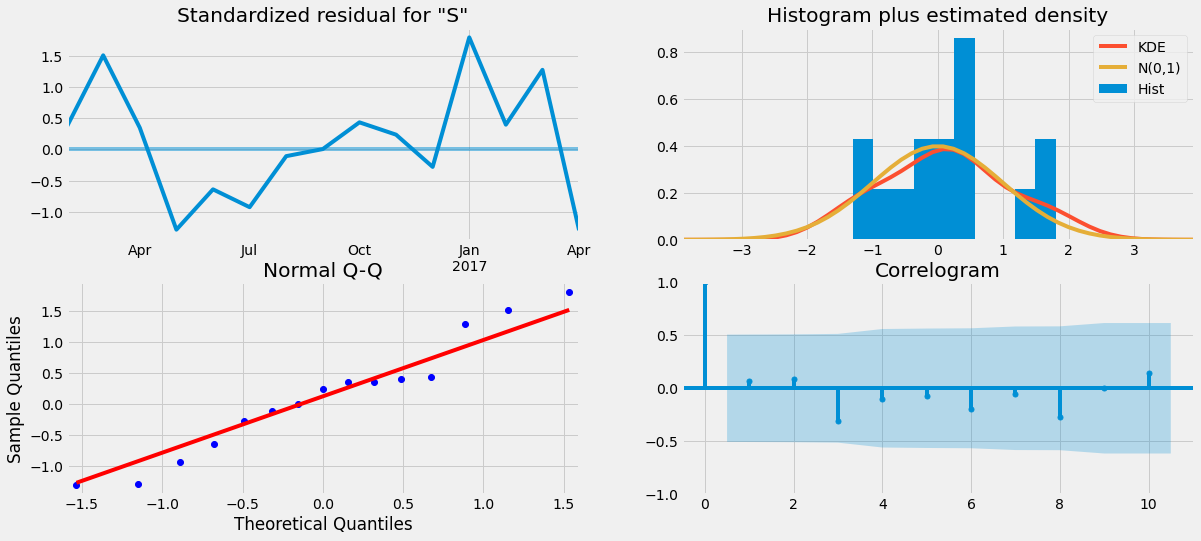

In [57]:
mod =sm.tsa.statespace.SARIMAX(train['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False)
results=mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics()
plt.show()

In [58]:
start=len(train)
end=len(train)+len(test)-1
pred=results.predict(start=start,end=end,typ='levels')
pred.index=office_supplies.index[start:end+1]
print(pred)

Order Date
2017-05-01    1163.056115
2017-06-01     644.193817
2017-07-01    1101.514650
2017-08-01     643.826986
2017-09-01    1320.403099
2017-10-01     587.308228
2017-11-01    1215.082645
2017-12-01     836.188026
2018-01-01     568.731756
2018-02-01     614.594964
2018-03-01     930.908912
2018-04-01     833.690146
2018-05-01     745.855411
2018-06-01     876.012059
2018-07-01     626.330165
2018-08-01     832.746727
2018-09-01     973.304879
2018-10-01     795.317426
2018-11-01    1078.371978
2018-12-01     689.507773
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='Order Date'>

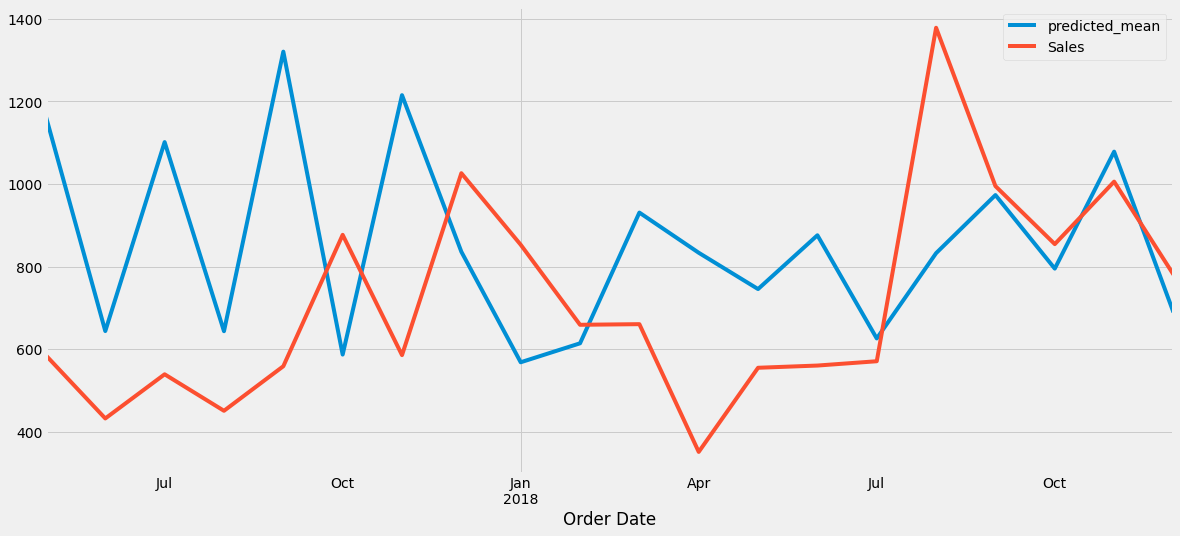

In [59]:
pred.plot(legend=True)
test['Sales'].plot(legend=True)

In [60]:
from sklearn.metrics import mean_squared_error
mean_squared_error(pred,test)

133420.39943395887

In [61]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(pred,test))
print(rmse)

365.2675723821632


In [62]:
mod =sm.tsa.statespace.SARIMAX(office_supplies['Sales'],order=(1,1,1),seasonal_order=(1,1,1,12),enforce_invertibility=False)
results2=mod.fit()

In [63]:
office_supplies.tail()

,Sales
Order Date,
2018-08-01,1378.194154
2018-09-01,994.999643
2018-10-01,854.620462
2018-11-01,1005.800077
2018-12-01,780.914071


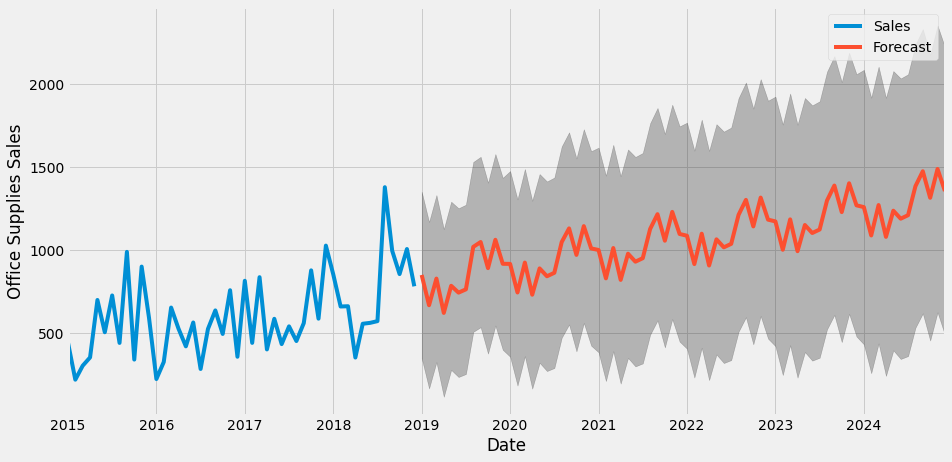

In [64]:
pred1=results2.get_forecast(steps=72)
predc=pred1.conf_int()
ax=office_supplies.plot(label='observed',figsize=(14,7))
pred1.predicted_mean.plot(ax=ax,label='Forecast')
ax.fill_between(predc.index,predc.iloc[:,0],predc.iloc[:,1],color='k',alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()